<h1>Modelo Predictivo de Consumo de Energía Electrica para el año 2024</h1>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

<h3> Carga de datos </h3>
Carga de datos desde un csv con la información y se extrae la información de interés. El nombre del csv es "datos_consumo_energetico.csv".


In [2]:
data = pd.read_csv('datos_consumo_energetico.csv', sep=';')
data = data[['Año', 'Mes', 'Temperatura media (°C)', 'Consumo GWh']]

<h3>Normalización de los datos </h3>

In [3]:
scaler = MinMaxScaler()
data_normalized = scaler.fit_transform(data)

<h3>Conjuntos de entrenamiento y prueba </h3>
- Se define la longitud de las secuencias</br>
- Se crean las secuencias de los datos</br>
- Se divide la información entre la sección de training y del testeo

In [4]:
window_size = 12  # Por ejemplo, considera los últimos 12 meses

# Crea secuencias de datos de entrenamiento con su correspondiente etiqueta (el siguiente mes)
def create_sequences(data, window_size):
    X = []
    y = []
    for i in range(len(data) - window_size):
        X.append(data[i:i + window_size])
        y.append(data[i + window_size][3])  # Consumo de energía en el siguiente mes
    return np.array(X), np.array(y)

# Crea las secuencias de entrenamiento y prueba
X, y = create_sequences(data_normalized, window_size)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

<h3> Construcción del modelo </h3>
Se contruye el modelo RNN con dos capas LSTM, una de 128 nodos y otra de 64 nodos, y dos capas densas, una de 32 nodos y otra de 1 nodo como salida del modelo. Adicionalmente, se compila el modelo con un optimizador de aprendizaje Adam.

Además, se agrega un early stopping cuando no hay mejoras en la validación.

In [5]:
model = keras.Sequential([
    keras.layers.LSTM(128, activation='relu', return_sequences=True, input_shape=(window_size, 4)),
    keras.layers.LSTM(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(loss='mean_squared_error', optimizer='adam')
adam_optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=adam_optimizer)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

<h3>Entrenamiento y evaluación</h3>
Se entrena el modelo y se realiza la evaluación mediante error cuadrático medio.

In [6]:
history = model.fit(X_train, y_train, epochs=75, batch_size=32, validation_split=0.2, verbose=False)
loss = model.evaluate(X_test, y_test)
print('Loss (Error cuadrático medio) en datos de prueba:', loss)

1/1 [==============================] - 0s 37ms/step - loss: 0.0120
Loss (Error cuadrático medio) en datos de prueba: 0.01202012412250042


Se crea un gráfico que permite comparar las epocas de entrenamiento con el error cuadrático medio en los datos de prueba.

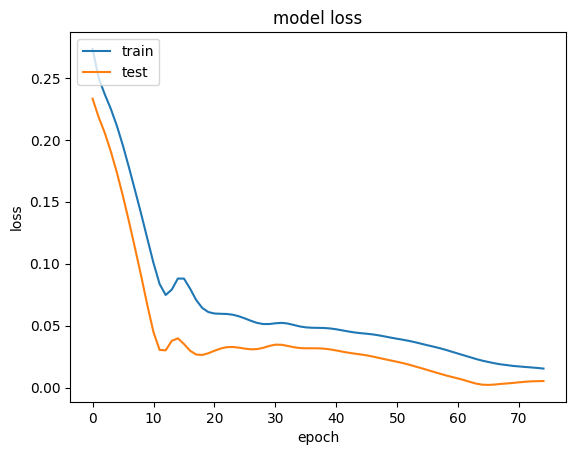

In [7]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

<h3> Predicciones del modelo </h3>

Se utiliza una ventana de tamaño 12 y se comienza a realizar las predicciones para cada mes. Los resultados se guardan en una lista de nombre predicciones_2024

In [8]:
# Realiza predicciones para el año 2024 utilizando los últimos datos históricos
ultimo_anio_historico = data_normalized[-window_size:]  # Últimos 12 meses históricos
predicciones_2024 = []

for mes in range(1, 13):  # Predice para cada mes del año 2024
    nuevo_dato = np.array([[2024, mes, ultimo_anio_historico[-1][2], 0]])
    nuevo_dato = scaler.transform(nuevo_dato)

    # Asegurarse de tener suficientes datos históricos para la predicción
    datos_historicos = np.concatenate((ultimo_anio_historico, nuevo_dato), axis=0)
    datos_historicos = datos_historicos[-window_size:]

    # Hacer la predicción con la secuencia histórica actualizada
    nuevo_dato = np.reshape(datos_historicos, (1, window_size, 4))
    prediccion_mes = model.predict(nuevo_dato)
    prediccion_mes = scaler.inverse_transform(np.array([[0, 0, 0, prediccion_mes[0][0]]]))

    predicciones_2024.append(prediccion_mes[0][3])
    ultimo_anio_historico = np.concatenate((ultimo_anio_historico, nuevo_dato[0]), axis=0)[1:]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 33ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 23ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 26ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 [==============================] - 0s 27ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


<h3>Resultados del modelo</h3>

In [11]:
print('Predicciones para los meses de 2024 (Consumo de energía):', predicciones_2024)
resultado_final = 0
for valor in predicciones_2024:
  resultado_final = resultado_final + valor
print('Predicción final para el año 2024: ', resultado_final, 'GWh')

Predicciones para los meses de 2024 (Consumo de energía): [365.9180123806, 313.3059338629246, 262.2717667222023, 231.85815271735194, 214.3171406388283, 206.4449334740639, 203.11280560493472, 206.2984082400799, 217.7777591645718, 235.4439631700516, 255.51657333970073, 261.6272474527359]
Predicción final para el año 2024:  2973.8926967680454 GWh


In [12]:
# Realiza predicciones en los datos de prueba
predicciones_test = model.predict(X_test)


# Deshace la normalización para las predicciones y las etiquetas (valores reales)
predicciones_test = scaler.inverse_transform(np.hstack((np.zeros((predicciones_test.shape[0], 3)), predicciones_test)))
y_test_desnormalizado = scaler.inverse_transform(np.hstack((np.zeros((y_test.shape[0], 3)), y_test.reshape(-1, 1))))

# Calcula el error cuadrático medio (MSE)
mse = np.mean((y_test_desnormalizado[:, 3] - predicciones_test[:, 3]) ** 2)
rmse = np.sqrt(mse)
mae = np.mean(np.abs(y_test_desnormalizado[:, 3] - predicciones_test[:, 3]))
rmspe = np.sqrt(np.mean(np.square(((y_test_desnormalizado[:, 3] - predicciones_test[:, 3]) / y_test_desnormalizado[:, 3])), axis=0))

print("Error cuadrático medio (MSE) en datos de prueba:", mse)
print('Raíz de error cuadrático medio (RMSE) en datos de prueba:', rmse)
print("Error absoluto medio (MAE) en datos de prueba:", mae)

# Porcentaje de error
print("Porcentaje de error obtenido (RMSPE): ", rmspe * 100)

1/1 [==============================] - 0s 30ms/step
Error cuadrático medio (MSE) en datos de prueba: 1763.219719777948
Raíz de error cuadrático medio (RMSE) en datos de prueba: 41.99070992229053
Error absoluto medio (MAE) en datos de prueba: 32.00678255409004
Porcentaje de error obtenido (RMSPE):  12.698288975026252


<h3> Comparación con años anteriores </h3>

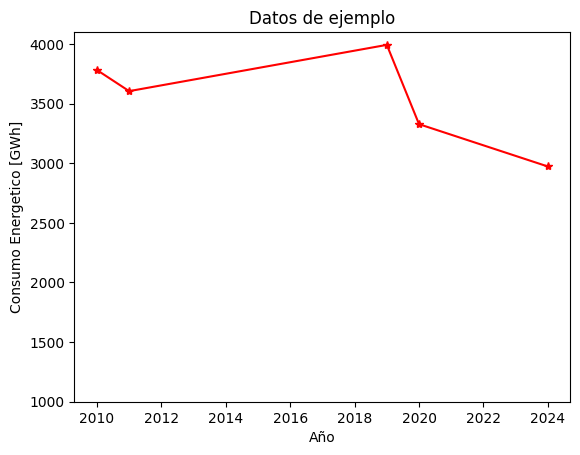

In [14]:
# Datos
x = [2010, 2011, 2019, 2020, 2024]
y = [3782, 3605, 3993, 3328, 2973]

# Crear el gráfico con estrellas para los puntos y línea entre los puntos
puntos = plt.plot(x, y, marker='*', linestyle='-')

# Etiquetas de los ejes
plt.xlabel('Año')
plt.ylabel('Consumo Energetico [GWh]')

plt.setp(puntos, "color", "r")

# Título del gráfico
plt.title('Datos de ejemplo')

plt.ylim(1000,4100)

# Mostrar el gráfico
plt.show()